In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv (r'c:/Users/Elitebook/OneDrive/Desktop/web dev/techchallenge_do_ipea_fase_4/bases/baseANP.csv')


In [3]:
df.head()

,regiao,estado,municipio,revenda,cnpj,nome_rua,numero_rua,complemento,bairro,cep,produto,data_coleta,valor_venda,unidade_medida,bandeira
0,S,RS,PORTO ALEGRE,COMERCIAL DE COMBUSTIVEIS INTERCAP LTDA,08.597.984/0001-41,AVENIDA BENTO GONCALVES,5300,NaN,AGRONOMIA,91540-000,DIESEL S10,2023-07-10,4.85,R$ / litro,RAIZEN
1,S,RS,PORTO ALEGRE,GIONGO E HAETINGER COMERCIO DE COMBUSTIVEIS LTDA,08.513.762/0001-01,AVENIDA BALTAZAR DE OLIVEIRA GARCIA,1000,NaN,SAO SEBASTIAO,91130-000,GASOLINA,2023-07-11,5.79,R$ / litro,VIBRA ENERGIA
2,S,RS,PORTO ALEGRE,GIONGO E HAETINGER COMERCIO DE COMBUSTIVEIS LTDA,08.513.762/0001-01,AVENIDA BALTAZAR DE OLIVEIRA GARCIA,1000,NaN,SAO SEBASTIAO,91130-000,GASOLINA ADITIVADA,2023-07-11,6.09,R$ / litro,VIBRA ENERGIA
3,S,RS,PORTO ALEGRE,GIONGO E HAETINGER COMERCIO DE COMBUSTIVEIS LTDA,08.513.762/0001-01,AVENIDA BALTAZAR DE OLIVEIRA GARCIA,1000,NaN,SAO SEBASTIAO,91130-000,DIESEL S10,2023-07-11,4.89,R$ / litro,VIBRA ENERGIA
4,S,RS,PORTO ALEGRE,GIONGO E HAETINGER COMERCIO DE COMBUSTIVEIS LTDA,08.513.762/0001-01,AVENIDA BALTAZAR DE OLIVEIRA GARCIA,1000,NaN,SAO SEBASTIAO,91130-000,ETANOL,2023-07-11,4.59,R$ / litro,VIBRA ENERGIA


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8684736 entries, 0 to 8684735
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   regiao          object 
 1   estado          object 
 2   municipio       object 
 3   revenda         object 
 4   cnpj            object 
 5   nome_rua        object 
 6   numero_rua      object 
 7   complemento     object 
 8   bairro          object 
 9   cep             object 
 10  produto         object 
 11  data_coleta     object 
 12  valor_venda     float64
 13  unidade_medida  object 
 14  bandeira        object 
dtypes: float64(1), object(14)
memory usage: 993.9+ MB


In [5]:
df.shape

(8684736, 15)

In [6]:
# transforma data_coleta de string para data
df['data_coleta'] = pd.to_datetime(df['data_coleta']) # type: ignore

In [7]:
df.info() # type: ignore

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8684736 entries, 0 to 8684735
Data columns (total 15 columns):
 #   Column          Dtype         
---  ------          -----         
 0   regiao          object        
 1   estado          object        
 2   municipio       object        
 3   revenda         object        
 4   cnpj            object        
 5   nome_rua        object        
 6   numero_rua      object        
 7   complemento     object        
 8   bairro          object        
 9   cep             object        
 10  produto         object        
 11  data_coleta     datetime64[ns]
 12  valor_venda     float64       
 13  unidade_medida  object        
 14  bandeira        object        
dtypes: datetime64[ns](1), float64(1), object(13)
memory usage: 993.9+ MB


In [8]:
# verifica se há nulos nas colunas
df.isnull().sum() # type: ignore

regiao                  0
estado                  0
municipio               0
revenda                 0
cnpj                    0
nome_rua                0
numero_rua           4402
complemento       6672704
bairro              24280
cep                     0
produto                 0
data_coleta             0
valor_venda             0
unidade_medida          0
bandeira                0
dtype: int64

In [9]:
df_anp = df[['data_coleta', 'regiao', 'estado', 'municipio', 'bandeira', 'produto', 'valor_venda']]

In [10]:
print(df_anp.shape)

(8684736, 7)


In [11]:
df_anp.head()

,data_coleta,regiao,estado,municipio,bandeira,produto,valor_venda
0,2023-07-10,S,RS,PORTO ALEGRE,RAIZEN,DIESEL S10,4.85
1,2023-07-11,S,RS,PORTO ALEGRE,VIBRA ENERGIA,GASOLINA,5.79
2,2023-07-11,S,RS,PORTO ALEGRE,VIBRA ENERGIA,GASOLINA ADITIVADA,6.09
3,2023-07-11,S,RS,PORTO ALEGRE,VIBRA ENERGIA,DIESEL S10,4.89
4,2023-07-11,S,RS,PORTO ALEGRE,VIBRA ENERGIA,ETANOL,4.59


In [12]:
# cria duas colunas: ano e mes
df_anp['ano'] = df_anp['data_coleta'].dt.year
df_anp['mes'] = df_anp['data_coleta'].dt.month

In [13]:
df_anp.head()

,data_coleta,regiao,estado,municipio,bandeira,produto,valor_venda,ano,mes
0,2023-07-10,S,RS,PORTO ALEGRE,RAIZEN,DIESEL S10,4.85,2023,7
1,2023-07-11,S,RS,PORTO ALEGRE,VIBRA ENERGIA,GASOLINA,5.79,2023,7
2,2023-07-11,S,RS,PORTO ALEGRE,VIBRA ENERGIA,GASOLINA ADITIVADA,6.09,2023,7
3,2023-07-11,S,RS,PORTO ALEGRE,VIBRA ENERGIA,DIESEL S10,4.89,2023,7
4,2023-07-11,S,RS,PORTO ALEGRE,VIBRA ENERGIA,ETANOL,4.59,2023,7


In [14]:
df_anp.describe().round(2)

,data_coleta,valor_venda,ano,mes
count,8684736,8684736.00,8684736.00,8684736.00
mean,2021-06-23 23:38:56.880151296,4.83,2021.00,6.30
min,2019-01-02 00:00:00,1.80,2019.00,1.00
25%,2020-01-29 00:00:00,3.77,2020.00,3.00
50%,2021-08-17 00:00:00,4.69,2021.00,6.00
75%,2022-09-01 00:00:00,5.79,2022.00,9.00
max,2023-12-29 00:00:00,9.79,2023.00,12.00
std,NaN,1.29,1.46,3.36


In [15]:
# Quais são os tipos de produtos que são comercializados
print(f'Os produtos comercializados são: {df_anp["produto"].unique()}')

Os produtos comercializados são: ['DIESEL S10' 'GASOLINA' 'GASOLINA ADITIVADA' 'ETANOL' 'DIESEL' 'GNV']


In [16]:
# Quais anos estão na base de dados?
print(f'Os anos presentes na base de dados são: {df_anp["ano"].unique()}')

Os anos presentes na base de dados são: [2023 2019 2020 2021 2022]


In [17]:
# Descobrindo os valores mínimos, máximos e médios dos produtos por ano
df_anp_valor = df_anp[['ano', 'produto', 'valor_venda']].groupby(['produto', 'ano']).agg(['min', 'max', 'mean']).round(2)
df_anp_valor

valor_venda            
                                min   max  mean
produto            ano                         
DIESEL             2019        2.87  4.99  3.60
                   2020        2.45  5.09  3.42
                   2021        3.10  6.99  4.69
                   2022        3.14  9.00  6.63
                   2023        3.97  7.99  5.76
DIESEL S10         2019        2.79  5.09  3.69
                   2020        2.46  5.38  3.51
                   2021        2.80  6.96  4.74
                   2022        3.59  9.65  6.73
                   2023        4.19  9.00  5.86
ETANOL             2019        2.10  5.47  3.17
                   2020        1.80  5.15  3.18
                   2021        2.05  7.90  4.67
                   2022        2.49  7.98  4.85
                   2023        2.69  6.96  4.00
GASOLINA           2019        3.39  6.29  4.42
                   2020        2.87  5.90  4.28
                   2021        3.10  8.00  5.89
                   2022        3.49  8.99  6.32
                   2023        4.09  8.19  5.53
GASOLINA ADITIVADA 2020        3.69  6.00  4.59
                   2021        3.46  8.99  6.04
                   2022        4.09  9.28  6.47
                   2023        3.47  9.79  5.71
GNV                2019        2.00  4.56  3.22
                   2020        2.00  4.78  3.17
                   2021        2.38  6.70  3.89
                   2022        3.17  7.99  5.04
                   2023        2.39  6.71  4.64

In [18]:
# Descobrindo os valores mínimos, máximos e médios dos produtos por ano - recorte por Estado
df_anp_valor_estado = df_anp[['ano', 'estado', 'produto', 'valor_venda']].groupby(['produto', 'ano', 'estado']).agg(['min', 'max', 'mean']).round(2)
df_anp_valor_estado

valor_venda            
                            min   max  mean
produto ano  estado                        
DIESEL  2019 AC            4.04  4.99  4.44
             AL            3.39  4.31  3.78
             AM            3.36  4.47  3.81
             AP            3.62  4.99  4.17
             BA            3.11  4.65  3.62
...                         ...   ...   ...
GNV     2023 RR            4.99  4.99  4.99
             RS            3.24  6.59  5.06
             SC            4.44  6.19  5.27
             SE            4.47  5.19  4.90
             SP            3.49  6.06  4.53

[754 rows x 3 columns]

In [19]:
# descobrir a quantidade de bandeiras por produto / ano
df_anp_bandeira = df_anp[['ano', 'bandeira', 'produto']]

In [20]:
df_anp_bandeira.groupby(['ano','produto']).bandeira.nunique()

ano   produto           
2019  DIESEL                59
      DIESEL S10            61
      ETANOL                63
      GASOLINA              64
      GNV                   22
2020  DIESEL                52
      DIESEL S10            57
      ETANOL                58
      GASOLINA              58
      GASOLINA ADITIVADA    43
      GNV                   23
2021  DIESEL                54
      DIESEL S10            54
      ETANOL                55
      GASOLINA              55
      GASOLINA ADITIVADA    54
      GNV                   22
2022  DIESEL                51
      DIESEL S10            60
      ETANOL                60
      GASOLINA              60
      GASOLINA ADITIVADA    58
      GNV                   24
2023  DIESEL                43
      DIESEL S10            46
      ETANOL                47
      GASOLINA              48
      GASOLINA ADITIVADA    47
      GNV                   22
Name: bandeira, dtype: int64

In [21]:
# descobrir a quantidade de bandeiras por produto / ano - quebra por Estado
df_anp_bandeira_estado = df_anp[['ano', 'bandeira', 'produto', 'estado',]]

In [22]:
df_anp_bandeira_estado.groupby(['ano','produto', 'estado']).bandeira.nunique()

ano   produto  estado
2019  DIESEL   AC        7
               AL        6
               AM        9
               AP        3
               BA        9
                        ..
2023  GNV      RR        1
               RS        6
               SC        8
               SE        4
               SP        6
Name: bandeira, Length: 754, dtype: int64

In [23]:
df_anp['produto'].unique()

array(['DIESEL S10', 'GASOLINA', 'GASOLINA ADITIVADA', 'ETANOL', 'DIESEL',
       'GNV'], dtype=object)

In [24]:
print(df_anp.shape)

(8684736, 9)


In [25]:
df_anp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8684736 entries, 0 to 8684735
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   data_coleta  datetime64[ns]
 1   regiao       object        
 2   estado       object        
 3   municipio    object        
 4   bandeira     object        
 5   produto      object        
 6   valor_venda  float64       
 7   ano          int32         
 8   mes          int32         
dtypes: datetime64[ns](1), float64(1), int32(2), object(5)
memory usage: 530.1+ MB


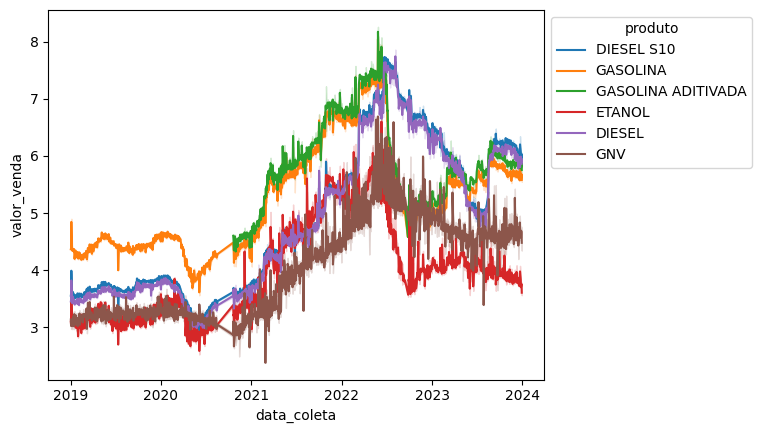

In [26]:
ax = sns.lineplot(data = df_anp, x = 'data_coleta', y = 'valor_venda', hue = 'produto')
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1)) 

In [27]:
# separando o dataset por tipo de produto
gasolina_aditivada = df_anp[df_anp['produto'] == 'GASOLINA ADITIVADA']
gasolina = df_anp[df_anp['produto'] == 'GASOLINA']
diesel_s10 = df_anp[df_anp['produto'] == 'DIESEL S10']
diesel = df_anp[df_anp['produto'] == 'DIESEL']
etanol = df_anp[df_anp['produto'] == 'ETANOL']
gnv = df_anp[df_anp['produto'] == 'GNV']

In [28]:
def plotar_boxplot_2V(titulo, labelx, labely, x, y, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.boxplot(x = x, y = y, data = dataset)
  ax.figure.set_size_inches(12, 6)
  ax.set_title(titulo, loc = 'left', fontsize = 18)
  ax.set_xlabel(labelx, fontsize = 14)
  ax.set_ylabel(labely, fontsize = 14)

In [29]:
def plotar_boxplot_geral(y, dataset):
  ax = sns.boxplot(y=y, data=dataset)
  ax.figure.set_size_inches(4, 4)

In [30]:
# Estatística básica de cada produto
print('Gasolina aditivada')
gasolina_aditivada.valor_venda.describe().round(2)

Gasolina aditivada


count    1042934.00
mean           6.02
std            0.83
min            3.46
25%            5.45
50%            5.90
75%            6.59
max            9.79
Name: valor_venda, dtype: float64

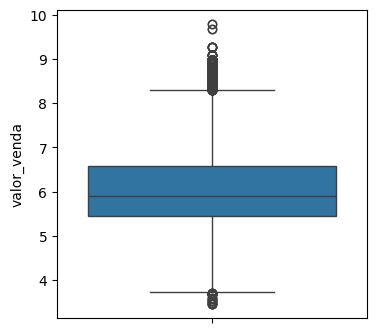

In [31]:
plotar_boxplot_geral('valor_venda', gasolina_aditivada)

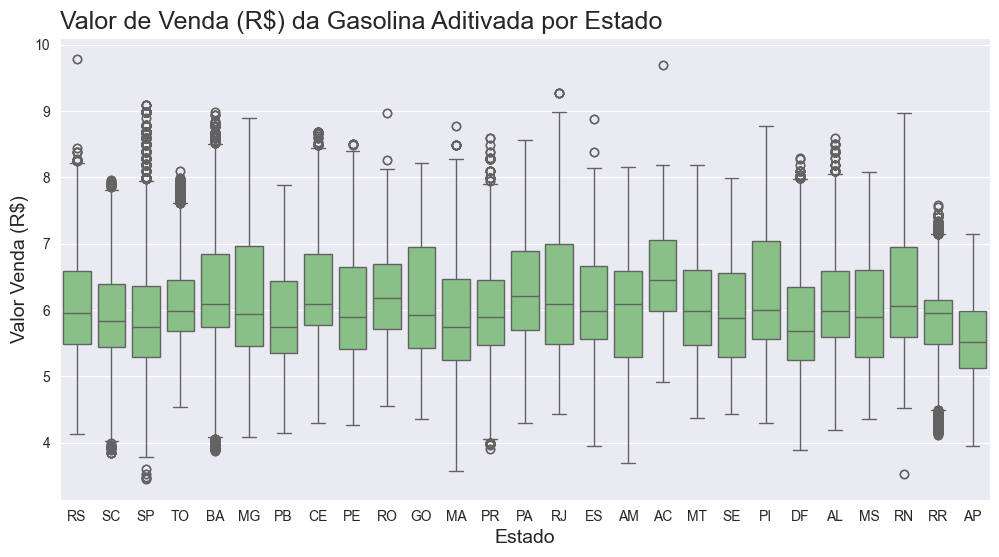

In [32]:
plotar_boxplot_2V('Valor de Venda (R$) da Gasolina Aditivada por Estado', 
                  'Estado',
                  'Valor Venda (R$)',
                  'estado',
                  'valor_venda',
                  gasolina_aditivada)

# Gasolina Comum

In [33]:
print('Gasolina Comum')
gasolina.valor_venda.describe().round(2)

Gasolina Comum


count    2368894.00
mean           5.23
std            1.01
min            2.87
25%            4.40
50%            5.00
75%            5.89
max            8.99
Name: valor_venda, dtype: float64

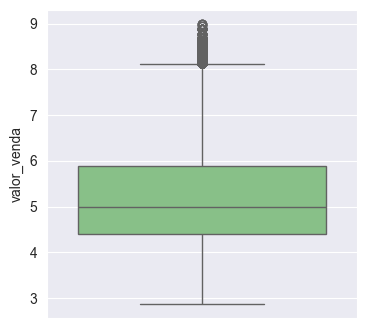

In [34]:
plotar_boxplot_geral('valor_venda', gasolina)

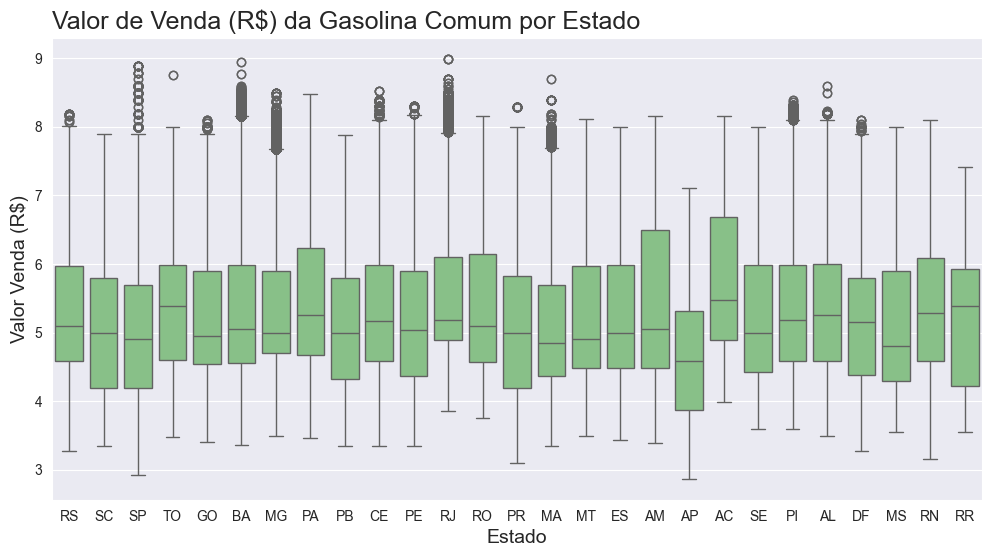

In [35]:
plotar_boxplot_2V('Valor de Venda (R$) da Gasolina Comum por Estado',
                  'Estado',
                  'Valor Venda (R$)',
                  'estado',
                  'valor_venda',
                  gasolina)

# Diesel S10

In [36]:
print('Diesel S10')
diesel_s10.valor_venda.describe().round(2)

Diesel S10


count    1890330.00
mean           4.82
std            1.35
min            2.46
25%            3.68
50%            4.45
75%            5.97
max            9.65
Name: valor_venda, dtype: float64

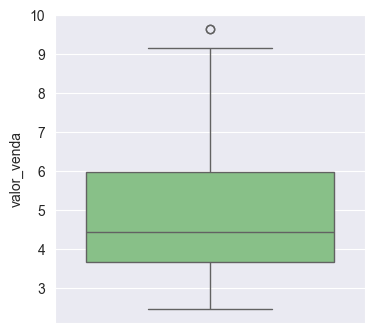

In [37]:
plotar_boxplot_geral('valor_venda', diesel_s10)

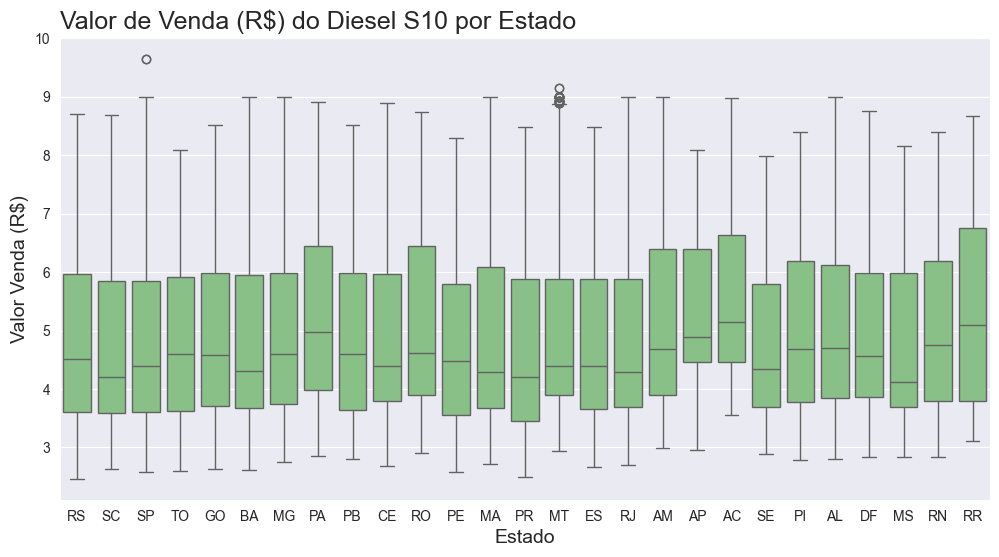

In [38]:
plotar_boxplot_2V('Valor de Venda (R$) do Diesel S10 por Estado',
                  'Estado',
                  'Valor Venda (R$)',
                  'estado',
                  'valor_venda',
                  diesel_s10)

# Diesel Comum

In [39]:
print('Diesel')
diesel.valor_venda.describe().round(2)

Diesel


count    1135062.00
mean           4.69
std            1.34
min            2.45
25%            3.55
50%            4.25
75%            5.79
max            9.00
Name: valor_venda, dtype: float64

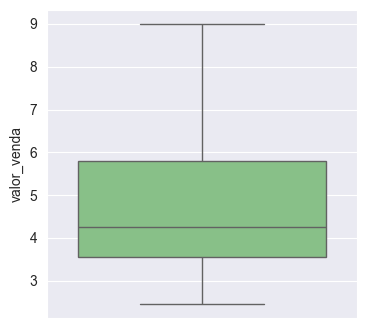

In [40]:
plotar_boxplot_geral('valor_venda', diesel)

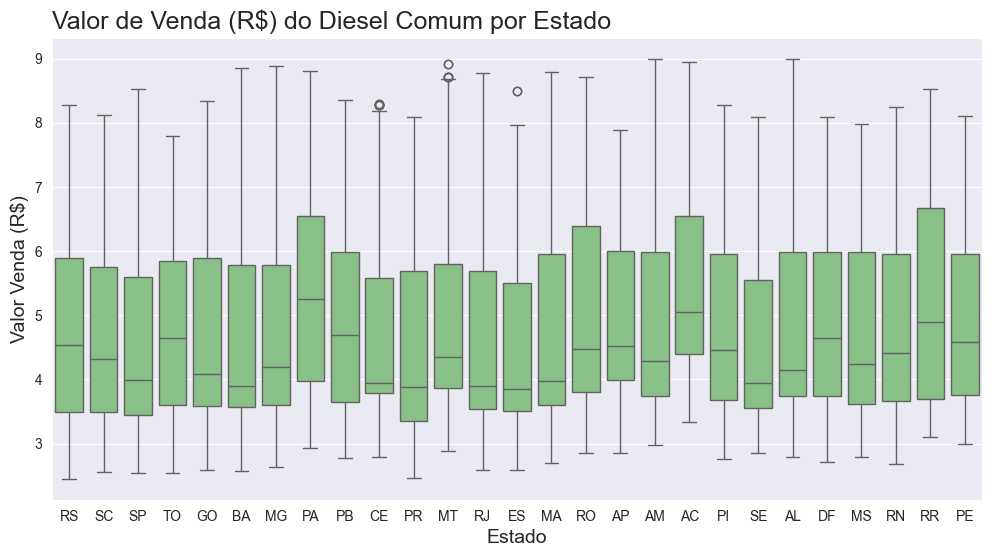

In [41]:
plotar_boxplot_2V('Valor de Venda (R$) do Diesel Comum por Estado',
                  'Estado',
                  'Valor Venda (R$)',
                  'estado',
                  'valor_venda',
                  diesel)

# Etanol

In [42]:
print('Etanol')
etanol.valor_venda.describe().round(2)

Etanol


count    2087908.00
mean           3.92
std            0.96
min            1.80
25%            3.19
50%            3.79
75%            4.57
max            7.98
Name: valor_venda, dtype: float64

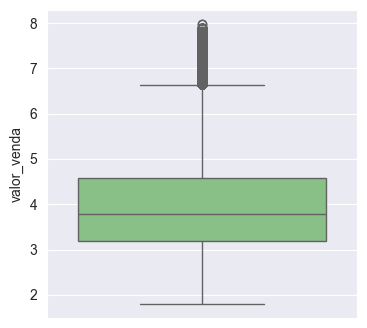

In [43]:
plotar_boxplot_geral('valor_venda', etanol)

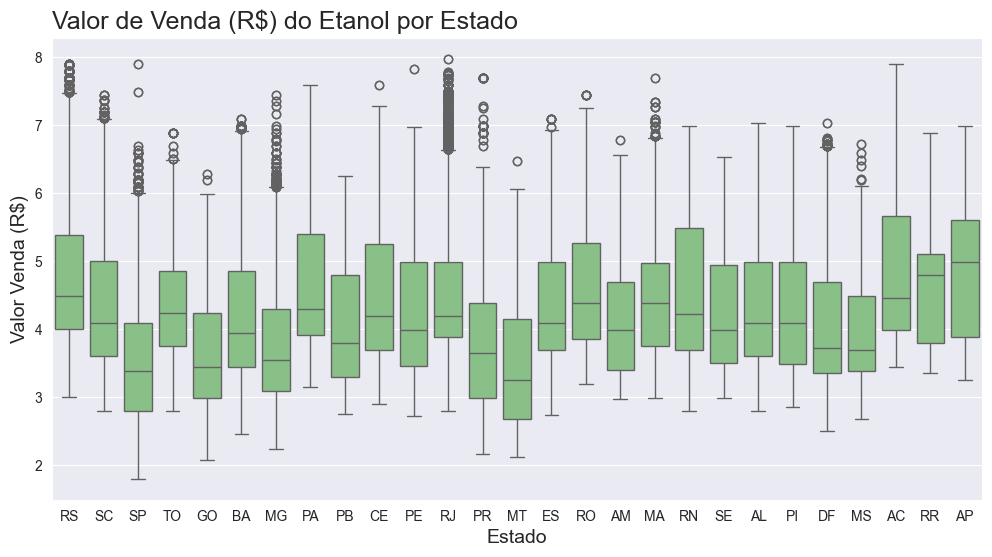

In [44]:
plotar_boxplot_2V('Valor de Venda (R$) do Etanol por Estado',
                  'Estado',
                  'Valor Venda (R$)',
                  'estado',
                  'valor_venda',
                  etanol)

# GNV

In [45]:
print('GNV')
gnv.valor_venda.describe().round(2)

GNV


count    159608.00
mean          4.07
std           0.91
min           2.00
25%           3.26
50%           4.00
75%           4.79
max           7.99
Name: valor_venda, dtype: float64

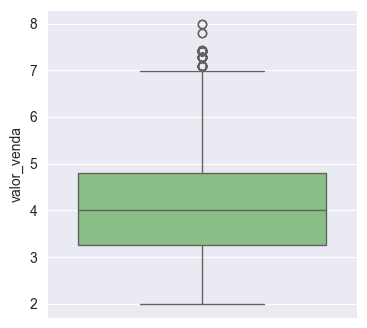

In [46]:
plotar_boxplot_geral('valor_venda', gnv)

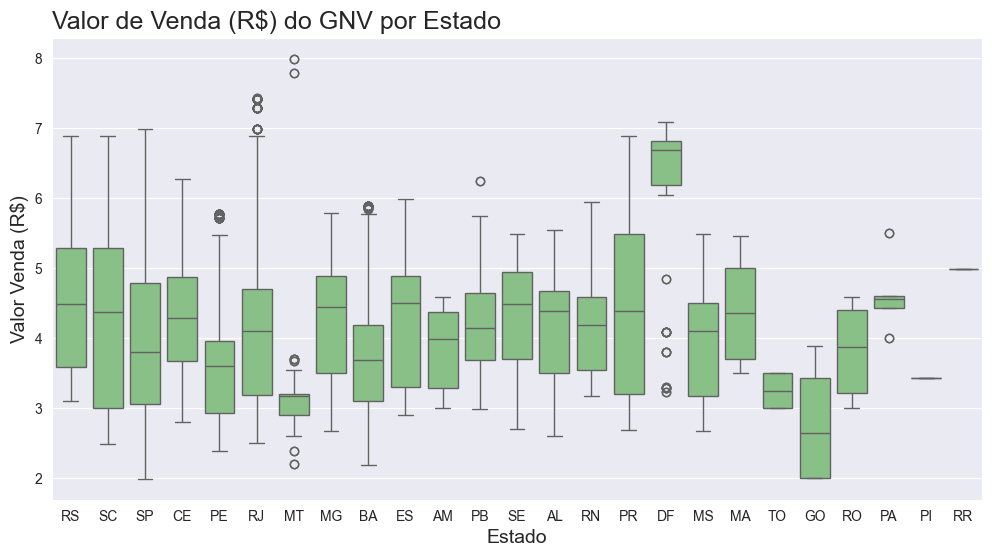

In [47]:
plotar_boxplot_2V('Valor de Venda (R$) do GNV por Estado',
                  'Estado',
                  'Valor Venda (R$)',
                  'estado',
                  'valor_venda',
                  gnv)

# Qtd. Bandeiras Distribuidoras de Combustível

In [48]:
df_anp['bandeira'].nunique()

80

In [49]:
bandeiras_estado = df_anp_bandeira_estado.groupby('estado').bandeira.nunique().reset_index()

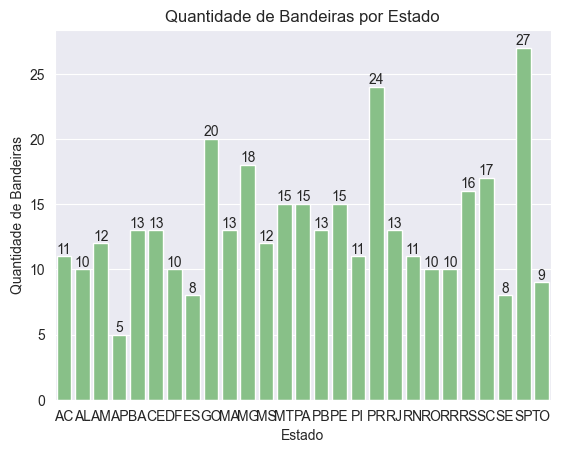

In [50]:
sns.barplot(x='estado', y='bandeira', data=bandeiras_estado)

plt.title('Quantidade de Bandeiras por Estado')
plt.xlabel('Estado')
plt.ylabel('Quantidade de Bandeiras')

for index, row in bandeiras_estado.iterrows():
    plt.annotate(row['bandeira'], xy=(index, row['bandeira']), ha='center', va='bottom')

plt.show()

In [51]:
# exporta df_anp para csv
# df_anp.to_csv('df_anp.csv', index=False)

In [1]:
import pandas as pd

In [12]:
df_anp_edit = pd.read_csv (r'C:\Users\Elitebook\OneDrive\Desktop\web dev\techchallenge_do_ipea_fase_4\bases\baseANP.csv')

In [13]:
df_anp_edit.head()

,regiao,estado,municipio,revenda,cnpj,nome_rua,numero_rua,complemento,bairro,cep,produto,data_coleta,valor_venda,unidade_medida,bandeira
0,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,GASOLINA,2019-01-03,4.199,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
1,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,ETANOL,2019-01-03,2.899,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
2,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,DIESEL S10,2019-01-03,3.349,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
3,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,GNV,2019-01-03,2.439,R$ / m³,PETROBRAS DISTRIBUIDORA S.A.
4,S,RS,CANOAS,METROPOLITANO COMERCIO DE COMBUSTIVEIS LTDA,88.587.589/0001-17,AVENIDA GUILHERME SCHELL,6340,NaN,CENTRO,92310-000,GASOLINA,2019-01-02,4.399,R$ / litro,BRANCA


In [14]:
df_anp_revenda = df_anp_edit[['data_coleta', 'regiao', 'estado', 'municipio', 'bandeira', 'produto', 'valor_venda', 'revenda']]

In [15]:
df_anp_revenda.head()

,data_coleta,regiao,estado,municipio,bandeira,produto,valor_venda,revenda
0,2019-01-03,SE,SP,GUARULHOS,PETROBRAS DISTRIBUIDORA S.A.,GASOLINA,4.199,AUTO POSTO SAKAMOTO LTDA
1,2019-01-03,SE,SP,GUARULHOS,PETROBRAS DISTRIBUIDORA S.A.,ETANOL,2.899,AUTO POSTO SAKAMOTO LTDA
2,2019-01-03,SE,SP,GUARULHOS,PETROBRAS DISTRIBUIDORA S.A.,DIESEL S10,3.349,AUTO POSTO SAKAMOTO LTDA
3,2019-01-03,SE,SP,GUARULHOS,PETROBRAS DISTRIBUIDORA S.A.,GNV,2.439,AUTO POSTO SAKAMOTO LTDA
4,2019-01-02,S,RS,CANOAS,BRANCA,GASOLINA,4.399,METROPOLITANO COMERCIO DE COMBUSTIVEIS LTDA


In [17]:
# exporta df_anp_revenda para csv
# df_anp_revenda.to_csv('df_anp_revenda.csv', index=False)